In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({'font.size': 12})  

In [20]:
# Updated DataFrame based on the new input
data_new = {
    "num_visite": [
        "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1", "V1",
        "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2",
        "V2", "V2", "V2", "V2", "V2", "V2", "V2", "V2"
    ],
    "item": [
        "The training is tailored to your needs", "The training is tailored to your needs",
        "The training objectives are met", "The training objectives are met",
        "The explanations are clear", "The explanations are clear",
        "What you have learned is applicable in daily life", "What you have learned is applicable in daily life",
        "What you have learned has been useful to you", "What you have learned has been useful to you",
        "The duration of the sessions seemed to you", "The duration of the sessions seemed to you",
        "The training met your expectations", "The training met your expectations",
        "The program format is appropriate", "The program format is appropriate",
        "The digital tool is easy to use", "The digital tool is easy to use",
        "The training is tailored to your needs", "The training is tailored to your needs", "The training is tailored to your needs",
        "The training objectives are met", "The training objectives are met", "The training objectives are met",
        "The explanations are clear", "The explanations are clear",
        "What you have learned is applicable in daily life", "What you have learned is applicable in daily life", "What you have learned is applicable in daily life",
        "What you have learned has been useful to you", "What you have learned has been useful to you", "What you have learned has been useful to you",
        "The duration of the sessions seemed to you", "The duration of the sessions seemed to you", "The duration of the sessions seemed to you",
        "The training met your expectations", "The training met your expectations", "The training met your expectations",
        "The program format is appropriate", "The program format is appropriate", "The program format is appropriate",
        "The digital tool is easy to use", "The digital tool is easy to use", "The digital tool is easy to use"
    ],
    "score": [
        "2- Satisfied", "3- Very satisfied", "2- Satisfied", "3- Very satisfied",
        "2- Satisfied", "3- Very satisfied", "2- Satisfied", "3- Very satisfied",
        "2- Satisfied", "3- Very satisfied", "2- Satisfied", "3- Very satisfied",
        "2- Satisfied", "3- Very satisfied", "2- Satisfied", "3- Very satisfied",
        "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied",
        "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied",
        "1- Slightly satisfied", "2- Satisfied", "3- Very satisfied"
    ],
    "perc": [
        0.5454545, 0.4545455, 0.6363636, 0.3636364, 0.1818182, 0.8181818,
        0.4545455, 0.5454545, 0.6363636, 0.3636364, 0.7272727, 0.2727273,
        0.6363636, 0.3636364, 0.8181818, 0.1818182, 0.7272727, 0.2727273,
        0.1, 0.6, 0.3, 0.1, 0.5, 0.4, 0.5, 0.5, 0.1, 0.6, 0.3, 0.2, 0.5, 0.3,
        0.1, 0.7, 0.2, 0.1, 0.5, 0.4, 0.1, 0.7, 0.2, 0.1, 0.5, 0.4
    ]
}

In [21]:
df = pd.DataFrame(data_new)

In [31]:
# Pivot data to prepare for radar plot
radar_data = {}

items = sorted(df['item'].unique())

score_labels = ['1- Slightly satisfied', '2- Satisfied', '3- Very satisfied']

for item in items:
    item_df = df[df['item'] == item]
    row = {'V1': [0, 0, 0], 'V2': [0, 0, 0]}
    for _, r in item_df.iterrows():
        score = r['score']
        idx = score_labels.index(score) if score in score_labels else None
        if idx is not None:
            row[r['num_visite']][idx] = r['perc']
    radar_data[item] = row

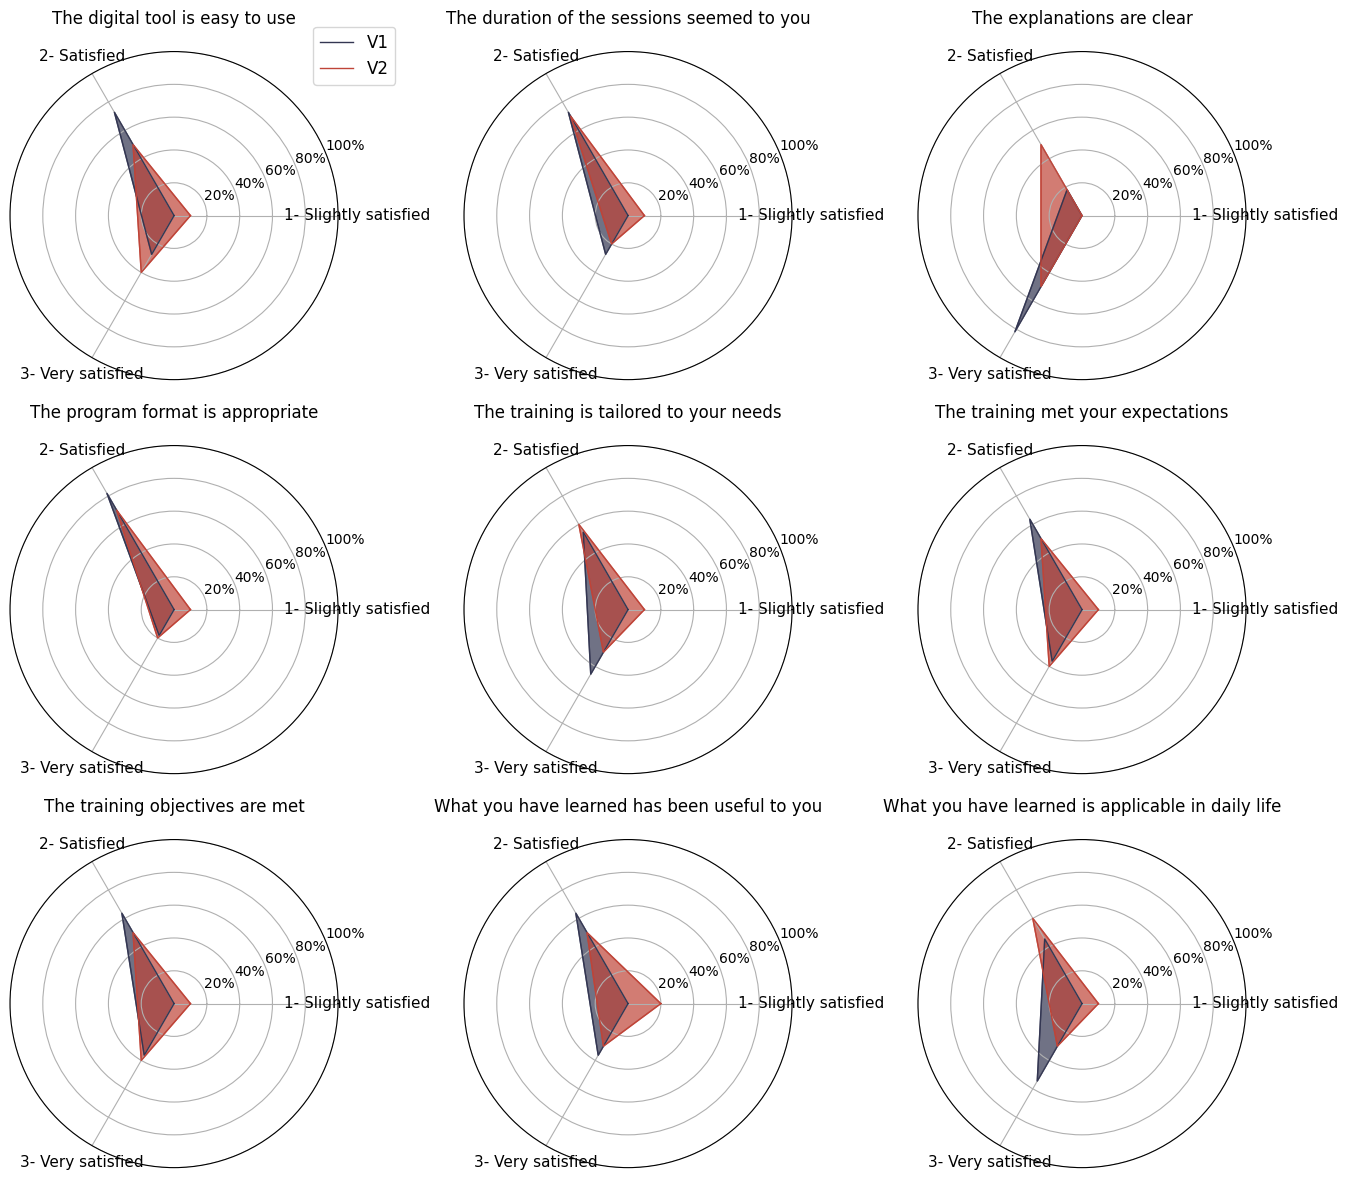

In [28]:
# Radar plot setup
angles = np.linspace(0, 2 * np.pi, len(score_labels), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop


fig, axs = plt.subplots(3, 3, subplot_kw={'projection': 'polar'}, figsize=(14, 12))
axs = axs.flatten()

for ax, (item, scores) in zip(axs, radar_data.items()):
    v1_vals = scores['V1'] + scores['V1'][:1]
    v2_vals = scores['V2'] + scores['V2'][:1]

    ax.plot(angles, v1_vals, color='#333652', linewidth=1, label='V1')
    ax.fill(angles, v1_vals, color='#333652', alpha=0.7)

    ax.plot(angles, v2_vals, color='#bf4438', linewidth=1, label='V2')
    ax.fill(angles, v2_vals, color='#bf4438', alpha=0.7)

    ax.set_title(item, size=10, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(score_labels, fontsize=8)
    ax.set_yticklabels([])
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=7)
    ax.set_title(item, size=12, pad=20)  # Bigger title
    ax.set_xticklabels(score_labels, fontsize=11)  # Category labels
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)  # Radial ticks

    # legend = ax.legend(loc='upper right', fontsize=9)  # Legend size
    ax.set_ylim(0, 1)
    ax.grid(True)

axs[0].legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()
